**EDA DEIENE**

¿Cuáles son las categorías con apps mejor calificadas?
¿Hay alguna relación entre las calificaciones y el número de descargas?                                   
¿Las apps gratuitas tienen mejores calificaciones que las de pago?
¿Cuál es la distribución de precios de las apps?
¿Cuál es la correlación entre el número de instalaciones y el precio?
¿Las apps que más duran en el mercado tienen mejores calificaciones?

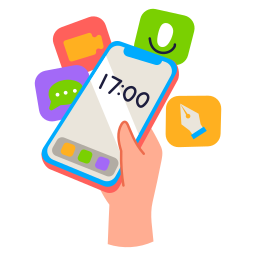        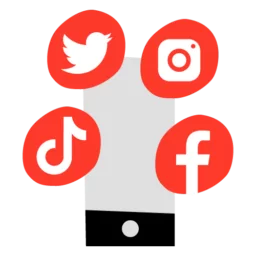

In [1]:
#IMPORTACIÓN DE LIBRERÍAS NECESARIAS: 

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#COMPROBACIÓN DIRECTORIO (en más de una ocasión me ha dado problemas):

current_directory = os.getcwd()
print("El directorio actual es:", current_directory)

os.chdir('C:/Users/Marian/Desktop/DS/ONLINE_DS_THEBRIDGE_DEIENE/EDA')  
print("Nuevo directorio de trabajo:", os.getcwd())


El directorio actual es: c:\Users\Marian\Desktop\DS\ONLINE_DS_THEBRIDGE_DEIENE\EDA
Nuevo directorio de trabajo: C:\Users\Marian\Desktop\DS\ONLINE_DS_THEBRIDGE_DEIENE\EDA


**1. CARGAMOS LOS DATOS**

In [2]:
#DEFINICIÓN DE RUTA A LOS ARCHIVOS:

apps_file = './googleplaystore.csv'
reviews_file = './googleplaystore_user_reviews.csv'

#CARGAR LOS DATASETS:

df_apps = pd.read_csv(apps_file)
df_reviews = pd.read_csv(reviews_file)

In [3]:
# EXPLORAR LAS PRIMERAS FILAS DE LOS DATASETS:

print("Datos de apps:")
df_apps.head(10)

Datos de apps:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
print("Datos de reviews:")
df_reviews.head(10)

Datos de reviews:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [5]:
#EXPLORAR LA ESTRUCTURA DE CADA DATASET:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Observo que rating, type, content rating y ambas columnas de versiones tienen nulos.
Además, los tipos de datos de práticamente todas las columnas son de tipo object.

In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Todas las columnas menos 'App' tienen nulos.

**2. LIMPIEZA DE DATOS: ELIMINACIÓN DE NULOS Y DUPLICADOS**

In [7]:
df_apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
'''Antes de nada, dado que casi todas las columnas tienen datos de tipo objeto, 
voy a comprobar qué tipo de datos "mezclados" tienen las columnas clave que quiero limpiar:'''

print(df_apps['Price'].unique())
print(df_apps['Installs'].unique())
print(df_apps['Reviews'].unique())

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' 'Everyone'
 '$1.20' '$1.04']
['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+'

En Price: Casi todos los precios incluyen un signo de dólar y además, hay un string 'Everyone'.

En Installs: Los números contienen comas en vez de puntos y además contienen un '+'. 

En Reviews: La columna reviews parece "correcta", aunque en la evaluación inicial su tipo de datos está categorizado como object. Veremos

In [9]:
#1. Limpieza y eliminación de nulos en df_apps:

# Rating:

df_apps['Rating'] = df_apps['Rating'].fillna(df_apps['Rating'].median())
df_apps['Rating'].isnull().sum()


np.int64(0)

In [10]:
# Price: Sólo hay que limpiarla, ya que no tenía nulos
df_apps = df_apps[df_apps['Price'] != 'Everyone']
df_apps['Price'] = df_apps['Price'].str.replace('$', '').astype(float)
df_apps.Price.unique()


array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [11]:
# Installs: Sólo hay que limpiarla, ya que no tenía nulos

df_apps['Installs'] = (df_apps['Installs'].str.replace('[+,]','', regex=True)
                       .replace('Free', '0').astype(float))
df_apps.Installs.unique()


array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [12]:
# Reviews: Sólo hay que limpiarla, ya que no tenía nulos.

'''Sin embargo, es una columna de tipo object. Como tiene muchos valores únicos, con el método unique es
difícil detectar qué valoes no numéricos o caracteres "raros" tiene,
por lo tanto voy a cmabiar de método para limpiar la columa:'''

wrong_reviews = df_apps[pd.to_numeric(df_apps['Reviews'], errors = 'coerce').isna()]

print(wrong_reviews['Reviews'].unique())



[]


In [13]:
df_apps['Reviews'] = (df_apps['Reviews'].str.replace('M','e6').astype(float))
print(df_apps.Reviews.unique())

[1.59000e+02 9.67000e+02 8.75100e+04 ... 6.03000e+02 1.19500e+03
 3.98307e+05]


Por útimo, para saber la "edad" de cada aplicación, vamos a pasar la columna "Last Updated" a datetime y calcular su edad:

In [ ]:
df_apps['Last Updated'] = pd.to_datetime(df_apps['Last Updated'], errors = 'coerce')


0       2536 days 13:37:14.644626
1       2528 days 13:37:14.644626
2       2330 days 13:37:14.644626
3       2384 days 13:37:14.644626
4       2372 days 13:37:14.644626
                   ...           
10836   2702 days 13:37:14.644626
10837   2356 days 13:37:14.644626
10838   2888 days 13:37:14.644626
10839   3620 days 13:37:14.644626
10840   2337 days 13:37:14.644626
Name: Last Updated, Length: 10840, dtype: timedelta64[ns]

In [30]:
age = (pd.Timestamp.now() - df_apps['Last Updated']).dt.days
age

0        2536
1        2528
2        2330
3        2384
4        2372
         ... 
10836    2702
10837    2356
10838    2888
10839    3620
10840    2337
Name: Last Updated, Length: 10840, dtype: int64

In [32]:
df_apps['App Age (years)'] = age / 365
df_apps['App Age (years)']

0        6.947945
1        6.926027
2        6.383562
3        6.531507
4        6.498630
           ...   
10836    7.402740
10837    6.454795
10838    7.912329
10839    9.917808
10840    6.402740
Name: App Age (years), Length: 10840, dtype: float64

In [52]:
# Type: tenía un único nulo según la primera exploración

df_apps['Type'].isna().sum()

np.int64(1)

In [ ]:
# Con 'loc' asocio valores a filas específicas:

df_apps.loc[df_apps['Type'].isna() & (df_apps['Price'] == 0), 'Type'] = 'Free'
df_apps.loc[df_apps['Type'].isna() & (df_apps['Price'] > 0), 'Type'] = 'Paid'

In [56]:
print(f"Valores nulos en 'Type' ahora: {df_apps['Type'].isna().sum()}")

Valores nulos en 'Type' ahora: 0


In [37]:
# Eliminar duplicados
duplicated_rows = df_apps.duplicated(keep=False)

total_dup = duplicated_rows.sum()
total_dup

np.int64(893)

In [39]:
duplicates = df_apps[duplicated_rows]
duplicates

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App Age (years)
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842.0,37M,5000000.0,Free,0.0,Everyone,Books & Reference,2018-06-25,5.0.6,4.0 and up,6.484932
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730.0,Varies with device,50000000.0,Free,0.0,Everyone,Business,2018-04-02,Varies with device,Varies with device,6.715068
193,Google My Business,BUSINESS,4.4,70991.0,Varies with device,5000000.0,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,6.405479
204,Box,BUSINESS,4.2,159872.0,Varies with device,10000000.0,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,6.386301
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614.0,37M,10000000.0,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,6.416438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610.0,Varies with device,10000000.0,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device,6.704110
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370.0,Varies with device,1000000.0,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device,6.369863
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017.0,Varies with device,100000000.0,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device,6.479452
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123.0,86M,10000.0,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up,6.550685


In [43]:
df_apps = df_apps.drop_duplicates()


In [45]:
duplicated_rows = df_apps.duplicated(keep=False)

total_dup = duplicated_rows.sum()
total_dup

np.int64(0)

In [47]:
# Limpieza y eliminación de nulos y dupcados en df_reviews:

# En este caso, únicamente se van a eliminar directamente los nulos ya que no
# tiene sentido sustuirlos.

df_reviews = df_reviews.dropna(subset=['Translated_Review', 'Sentiment'])


In [48]:
#Comprobamos y eliminamos los duplicados de df_reviews:

duplicated_rows_2 = df_reviews.duplicated(keep=False)

total_dup_2 = duplicated_rows_2.sum()
total_dup_2

np.int64(13173)

In [49]:
duplicates_2 = df_reviews[duplicated_rows_2]
duplicates_2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64073,Hotels.com: Book Hotel Rooms & Find Vacation D...,The new system showing Top 10 whole search res...,Negative,-0.032727,0.670909
64075,Hotels.com: Book Hotel Rooms & Find Vacation D...,Mobile currently crashing. Their international...,Neutral,0.000000,0.200000
64112,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Good,Positive,0.700000,0.600000
64113,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Good,Positive,0.700000,0.600000


In [50]:
df_reviews = df_reviews.drop_duplicates()

In [51]:
duplicated_rows_2 = df_reviews.duplicated(keep=False)

total_dup_2 = duplicated_rows_2.sum()
total_dup_2

np.int64(0)

**3. ANÁLISIS UNIVARIANTE**

¿Qué es el análisis univariado?
Es el estudio estadístico y gráfico de una sola variable en un dataset. Este análisis responde preguntas como:

¿Qué tipo de variable es? (categórica, numérica, ordinal, etc.)
¿Cuál es la distribución de sus valores?
¿Hay valores extremos o atípicos (outliers)?
¿Existen patrones interesantes?

Pasos en el análisis univariado
Identificar el tipo de variable:

Variables categóricas: Toman un conjunto limitado de valores distintos (e.g., categorías de apps, géneros, tipo de usuario).
Variables numéricas: Toman valores numéricos continuos o discretos (e.g., calificaciones, precios, descargas).
Explorar distribuciones:

Resumen estadístico (media, mediana, desviación estándar, etc.).
Tablas de frecuencia para variables categóricas.
Histogramas, gráficos de barras o diagramas de caja.
Identificar valores faltantes o atípicos.


**3.1 VARIABLES NUMÉRICAS**

1. Resumen estadístico con describe
2. Histogramas: vsualizan la distribución de una variable numérica

In [58]:
#Antes de comenzar con el análisis univariante, vamos a hacer la clasificación de las variables:

categoricas = [col for col in df_apps if df_apps[col].dtype == 'object']
numericas = [col for col in df_apps if df_apps[col].dtype != 'object']

print(f"Variables categoricas: {categoricas}")
print(f"Variables numericas: {numericas}")

Variables categoricas: ['App', 'Category', 'Size', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']
Variables numericas: ['Rating', 'Reviews', 'Installs', 'Price', 'Last Updated', 'App Age (years)']


Variables numéricas: Exploraremos su distribución y estadísticas.

Utilizaremos histogramas, boxplots, y descripción estadística.
Variables categóricas: Exploraremos sus frecuencias y proporciones.

Utilizaremos gráficos de barras y tablas de frecuencia.

In [74]:
#3.1 VARIABLES NUMÉRICAS:
#Las variables numéricas clave son Rating, Installs, Price y App Age creada antes.

numericas_clave = ['Rating', 'Price', 'Installs', 'App Age (years)']

df_apps[numericas_clave].describe()

,Rating,Price,Installs,App Age (years)
count,10357.000000,10357.000000,1.035700e+04,10357.000000
mean,4.203737,1.030800,1.415776e+07,7.094815
std,0.485594,16.278625,8.023955e+07,1.092132
min,1.000000,0.000000,0.000000e+00,6.364384
25%,4.100000,0.000000,1.000000e+03,6.419178
50%,4.300000,0.000000,1.000000e+05,6.583562
75%,4.500000,0.000000,1.000000e+06,7.293151
max,5.000000,400.000000,1.000000e+09,14.586301


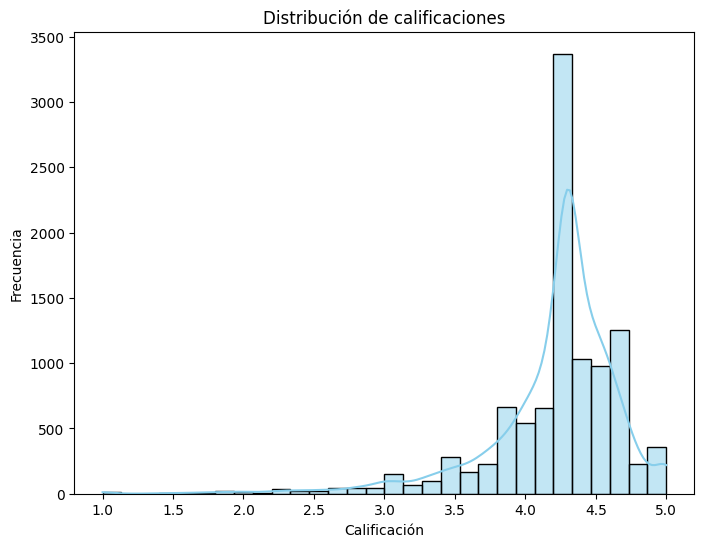

In [ ]:
# Dsitribución de Ratings:

plt.figure(figsize=(8,6))
sns.histplot(df_apps['Rating'], bins = 30, kde = True, color = 'skyblue')
plt.title('Distribución de calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de las aplicaciones tienen una calificación entre 4 y 5.

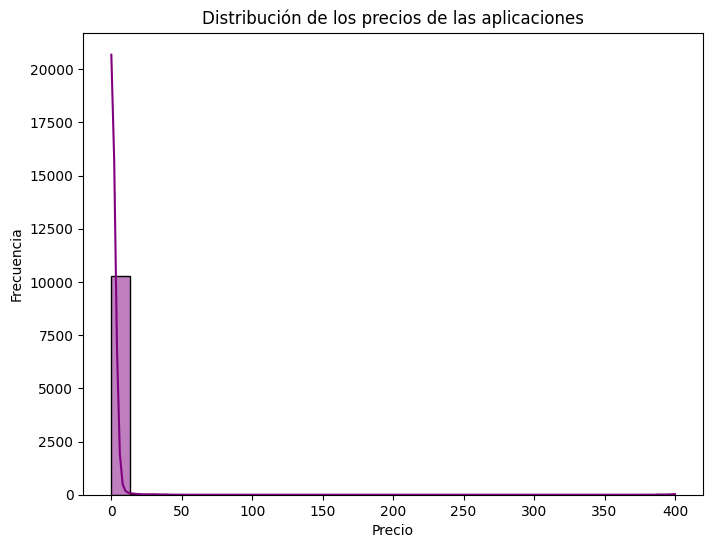

In [63]:
# Dsitribución de Price:

plt.figure(figsize=(8,6))
sns.histplot(df_apps['Price'], bins = 30, kde = True, color = 'purple')
plt.title('Distribución de los precios de las aplicaciones')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

En su mayoría son aplicaciones gratuitas.

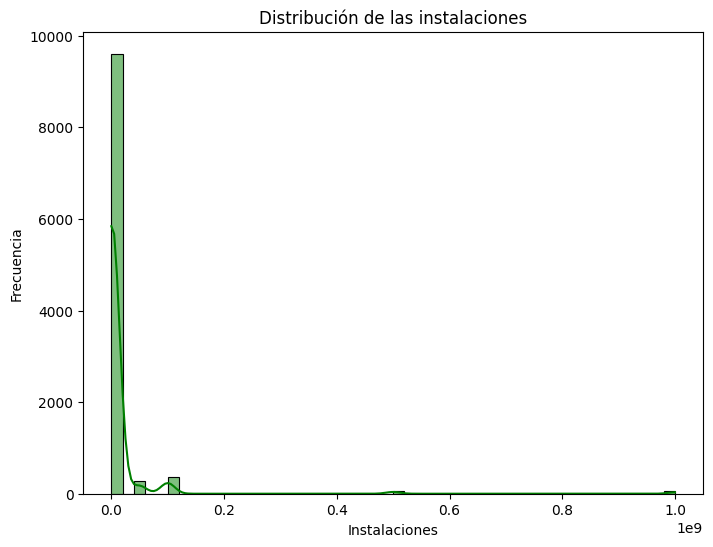

In [67]:
# Dsitribución de Installs:

plt.figure(figsize=(8,6))
sns.histplot(df_apps['Installs'], bins = 50, kde = True, color = 'green')
plt.title('Distribución de las instalaciones')
plt.xlabel('Instalaciones')
plt.ylabel('Frecuencia')
plt.show()

La mayoría tienen muy pocas descargas o instalaciones mientras que hay un par de pequeños picos de instalaciones, las cuales podrían corresponder a aplicaciones muy famosas como instagram, facebook...

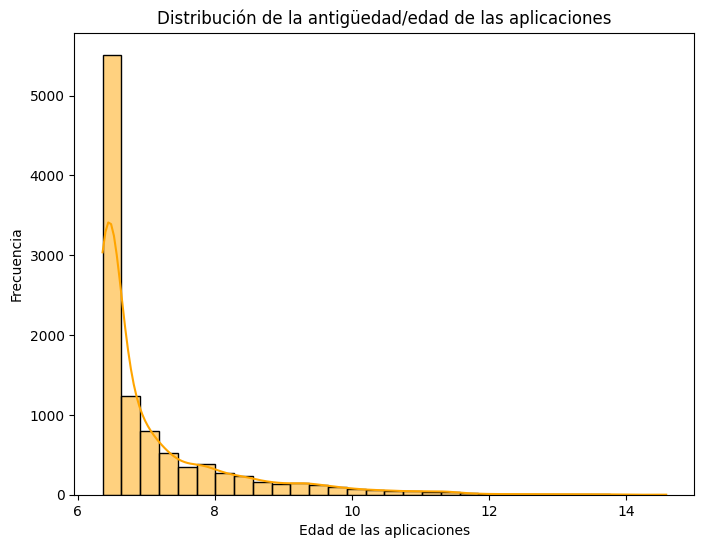

In [65]:
# Dsitribución de App Age(Years):

plt.figure(figsize=(8,6))
sns.histplot(df_apps['App Age (years)'], bins = 30, kde = True, color = 'orange')
plt.title('Distribución de la antigüedad/edad de las aplicaciones')
plt.xlabel('Edad de las aplicaciones')
plt.ylabel('Frecuencia')
plt.show()

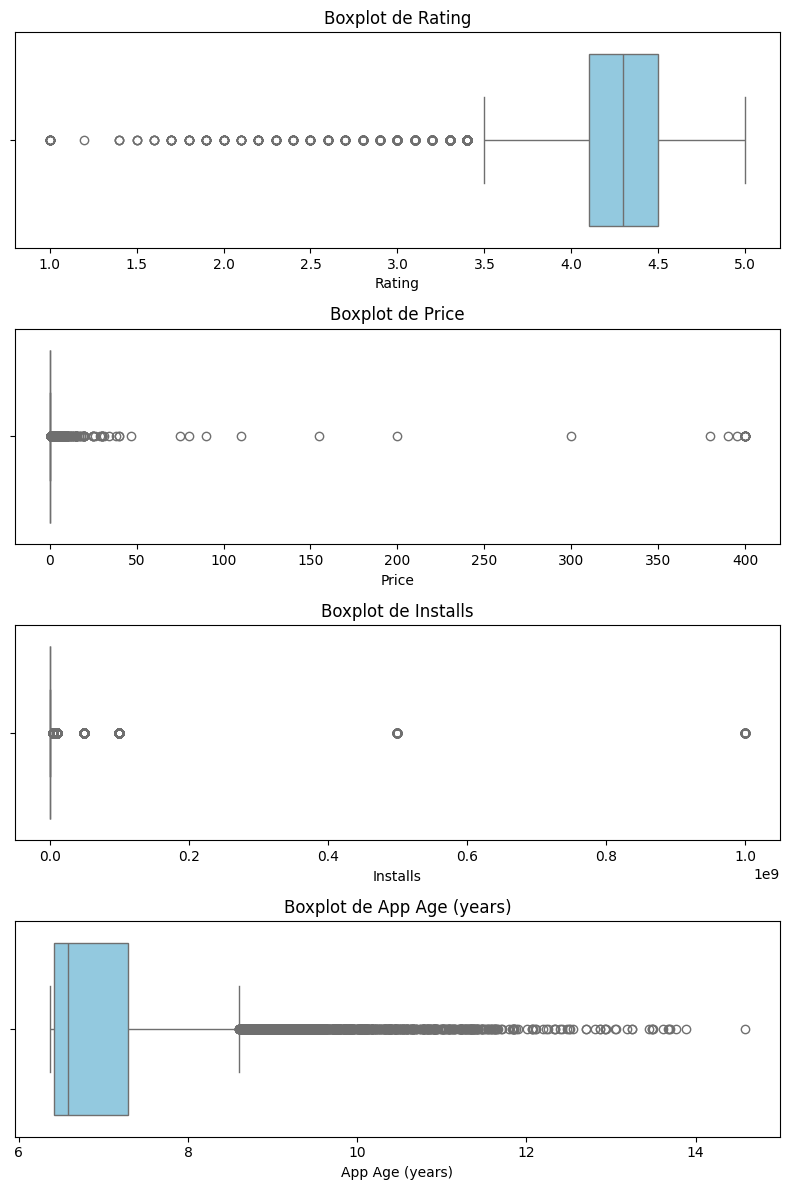

In [ ]:
# Boxplot para las variables numéricas clave:

fig, axes = plt.subplots(len(numericas_clave), 1, figsize=(8,12))

for ax, var in zip(axes, numericas_clave):
    sns.boxplot(x=df_apps[var], ax=ax, color = 'skyblue')
    ax.set_title(f"Boxplot de {var}")
    ax.set_xlabel(var)

plt.tight_layout()
plt.show()


- Ratings: La mayoría de las apps tienen buenas valoraciones (entre 4 y 4.5), siendo la mediana aprox 4.25, pero se dan outliers con valores de 1 y 2, es decir, apps con peores valoraciones.

- Price: La mayorías de las apps son gratuitas. Vemos alguna anomalía como el outlier en 400, podría tratarse de un error dado que no es común que una app pueda llegar a costar 300-400$.

- Installs: La gran mayorías de las apps se instalan muy poco y de hecho, la mediana está muy baja en comparación con los valores extremos. La distribución está muy sesgada. Se dan apps muy popularess que dominan claramente el mercado.

- App Age (Years): En general, las apps son bastante "jóvenes", ya que tienen todas menos de 8 años de antigüedad. Los outliers son apps con más de 10 años de edad. Esto puede sugerir que son apps que llevan ya mucho tiempo en el mercado y se trata de apps confiables y establecidas. 

In [79]:
#3.2 VARIABLES CATEGÓRICAS:

categoricas_clave = ['Category', 'Type', 'Content Rating']

for var in categoricas_clave:
    print(df_apps[var].value_counts())

Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: count, dtype: int64
Type
Free    9592
Paid     765
Name: coun

Voy a mirar la frecuencia total de Type y Content Rating individualmente, ya que se pierde la información arriba

In [81]:
df_apps.Type.value_counts()

Type
Free    9592
Paid     765
Name: count, dtype: int64

In [82]:
df_apps['Content Rating'].value_counts()

Content Rating
Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

En Content Rating hay clasificaciones que se pueden agrupar:

In [83]:
df_apps['Content Rating'] = df_apps['Content Rating'].replace({
    'Everyone 10+': 'Everyone',
    'Mature 17+': 'Adults',
    'Adults only 18+': 'Adults',
})

df_apps['Content Rating'].value_counts()

Content Rating
Everyone    8759
Teen        1146
Adults       450
Unrated        2
Name: count, dtype: int64

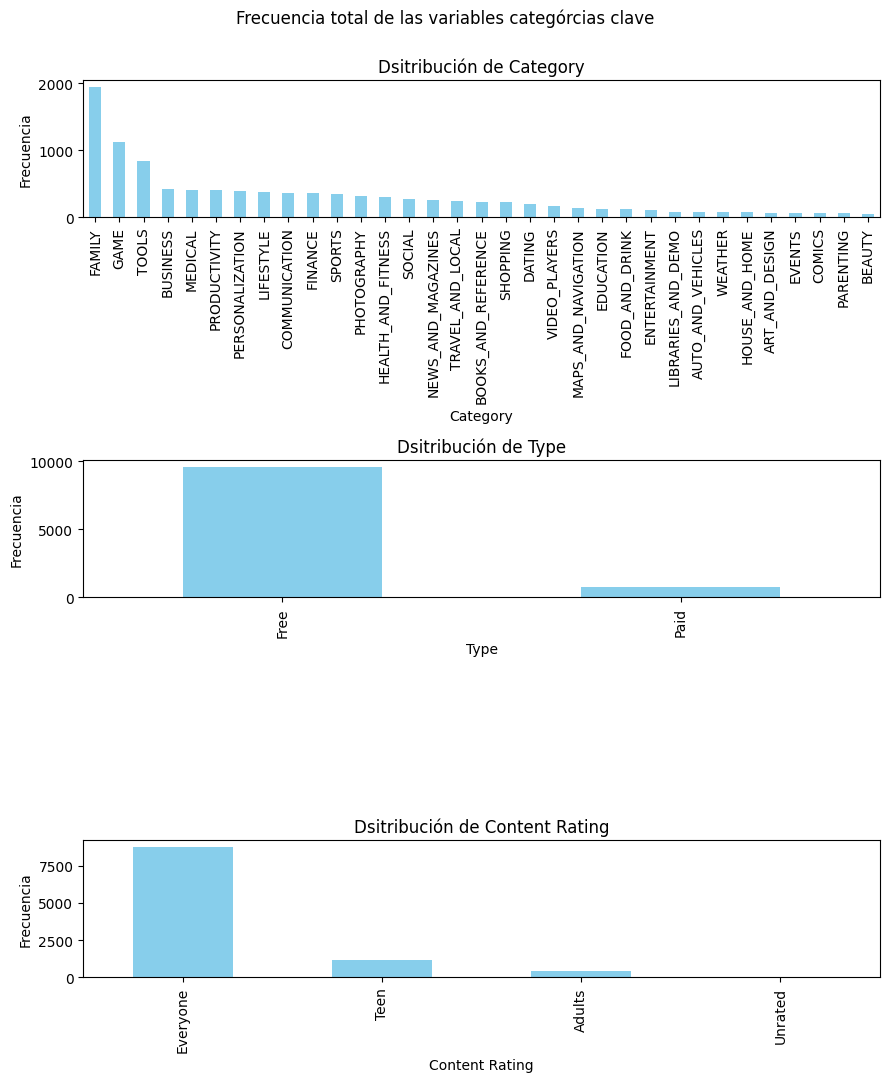

In [112]:
fig, axes = plt.subplots(len(categoricas_clave), 1, figsize=(9,11))
fig.suptitle('Frecuencia total de las variables categórcias clave')

for ax,var in zip(axes, categoricas_clave):
    frec = df_apps[var].value_counts()
    frec.plot(kind = 'bar', ax=ax, color='skyblue')
    ax.set_title(f"Dsitribución de {var}")
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis ='x', rotation = 90)

plt.tight_layout(rect=[0,0,1,0.98])
plt.show()

Vamo que la mayoría de las apps son gratuitas, como ya habíamos comprobado anteriorments, además están categorizadas para todos los públicos, lo cual tiene sentido teniendo en cuenta que las apps más utilizadas son de categoría familiar o de juegos.

In [113]:
#Análisis univariante dataset reviews: refrescando la memoria:

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [115]:
categoricas_rev = ['Sentiment', 'Translated_Review']
numericas_rev = ['Sentiment_Polarity', 'Sentiment_Subjectivity']

In [116]:
# Análisis numéricas clave:

df_reviews[numericas_rev].describe()


,Sentiment_Polarity,Sentiment_Subjectivity
count,29692.000000,29692.000000
mean,0.188868,0.490930
std,0.355694,0.265976
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422917,0.652703
max,1.000000,1.000000


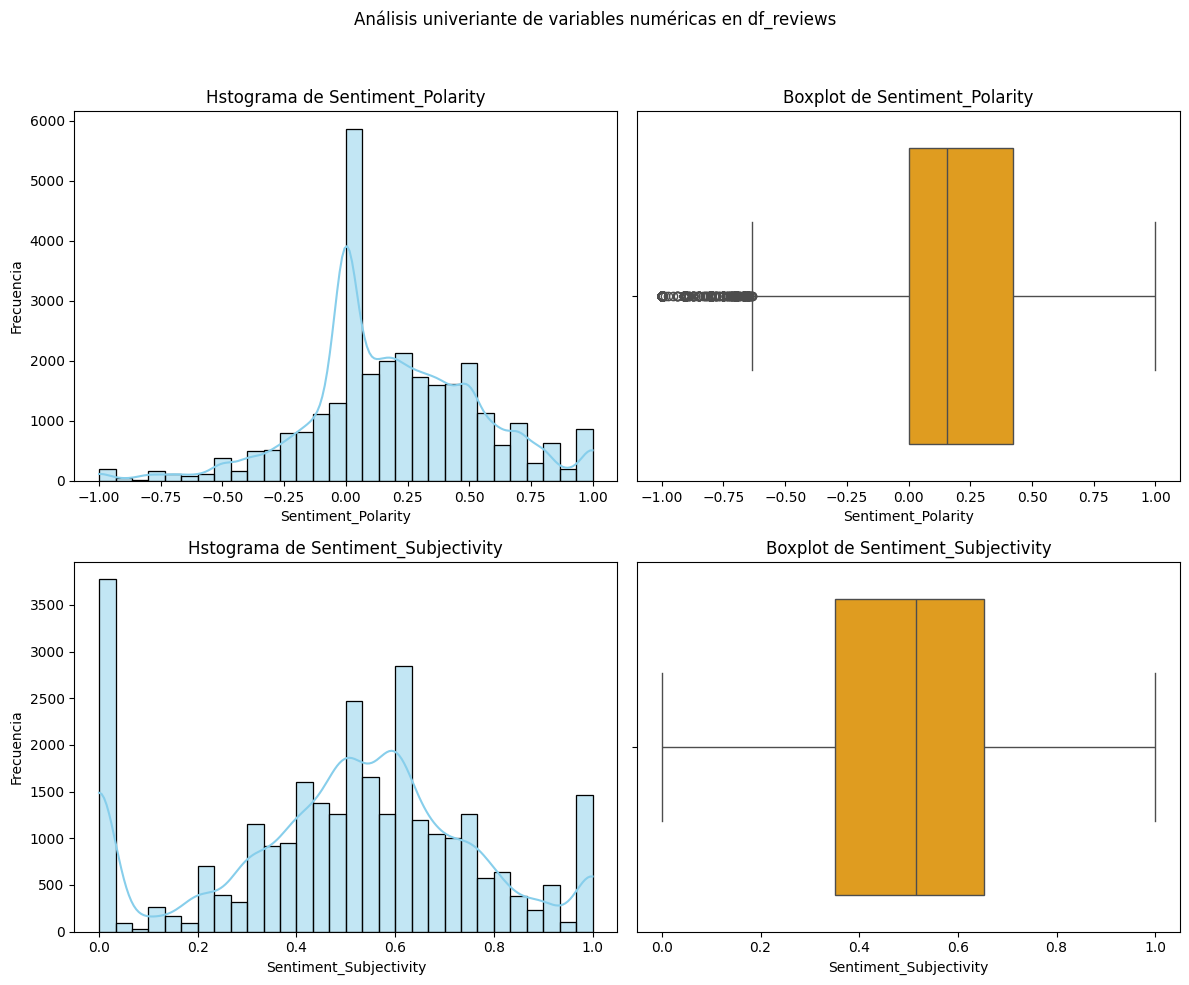

In [118]:
fig, axes = plt.subplots(2,2,figsize=(12,10))
fig.suptitle('Análisis univeriante de variables numéricas en df_reviews')

for i, var in enumerate(numericas_rev):
    sns.histplot(df_reviews[var], bins=30, kde=True, ax=axes[i,0], color = 'skyblue')
    axes[i,0].set_title(f"Hstograma de {var}")
    axes[i,0].set_xlabel(var)
    axes[i,0].set_ylabel('Frecuencia')

    sns.boxplot(x=df_reviews[var], ax=axes[i,1], color='orange')
    axes[i,1].set_title(f"Boxplot de {var}")
    axes[i,1].set_xlabel(var)

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


- Sentiment_Polarity representa cómo de positiva o negativa es una reseña (de -1 a 1). En este caso se que la gran mayoría de reseñas se sitúan en el cero, es decir, ni positiva ni negativa, a pesar de que hay varios outliers con valoraciones muy negativas. Habría que ver si esto coincide con el otro dataset df_apps.
- Sentiment_Subjectivity representa cómo de objetiva o subjetiva es esa reseña ( de 0 a 1). 


In [122]:
# Análisis categóricas clave:

for var in categoricas_rev:
    print(df_reviews[var].value_counts())


Sentiment
Positive    19015
Negative     6321
Neutral      4356
Name: count, dtype: int64
Translated_Review
Good                                 137
Nice                                 105
Great                                 90
Love                                  81
I love                                55
                                    ... 
An excellent A useful                  1
I found lot wealth form health...      1
Because I found important.             1
Healthy Eating                         1
Best idea us                           1
Name: count, Length: 27994, dtype: int64


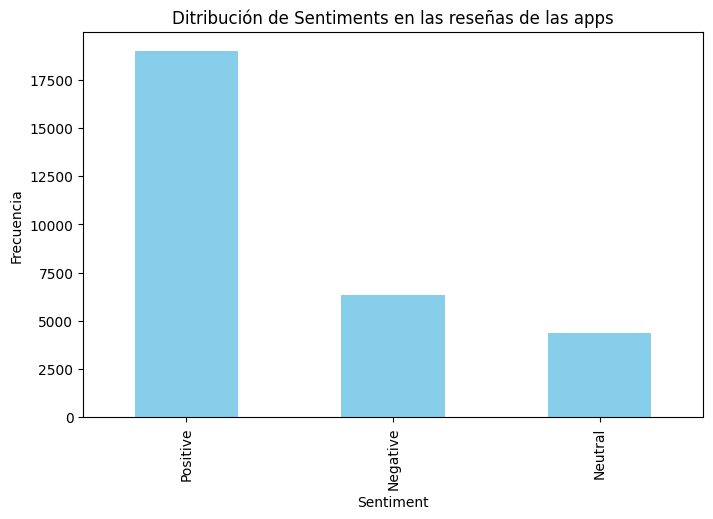

In [124]:
plt.figure(figsize=(8,5))
df_reviews['Sentiment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Ditribución de Sentiments en las reseñas de las apps')
plt.xlabel('Sentiment')
plt.ylabel('Frecuencia')
plt.show()


In [125]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


**2. ANÁLISIS BIVARIANTE**

Se observa que principalmente son aplicaciones con menos de 8 años de edad

¿Qué es la desviación estándar?
La desviación estándar muestra cómo de lejos están los datos del promedio (media).
Si la desviación estándar es pequeña, los datos están concentrados cerca de la media.
Si la desviación estándar es grande, los datos están más dispersos y alejados de la media.
Matemáticamente, se calcula como la raíz cuadrada de la varianza:

Ejemplo intuitivo
Supongamos que tenemos las siguientes calificaciones de apps:

Con datos concentrados:
[4.1, 4.2, 4.3, 4.2, 4.1]

Media: 4.18
Desviación estándar: baja (los valores están cerca de la media).
Con datos dispersos:
[3.0, 4.2, 5.0, 4.1, 1.5]

Media: 3.96
Desviación estándar: alta (los valores están más lejos de la media).

¿Cómo interpretar std en tus datos?
En el ejemplo que mencionaste:

std = 0.537429 para la columna Rating.
Esto significa que, en promedio, las calificaciones de las apps se desvían 0.54 puntos de la media (mean).
Por ejemplo:

Si la media es 4.2, entonces las calificaciones típicas estarán en el rango de aproximadamente 3.66 a 4.74 (1 desviación estándar hacia abajo y arriba).
¿Por qué es importante la desviación estándar?
Detectar dispersión:

Si la desviación estándar es muy alta, los datos son muy variables (menos consistentes).
Si es baja, los datos son más consistentes (poco dispersos).

Comparar distribuciones:

Puedes comparar diferentes columnas o datasets para ver cuál es más consistente.
Análisis de calidad:

En tu caso, una desviación estándar baja en Rating indicaría que las apps tienen calificaciones consistentes.


El valor de la desviación estándar (SD, std) es bajo o alto dependiendo del rango de valores y del contexto de la variable. Aquí tienes algunos puntos clave para interpretar la desviación estándar:

1. Comparación con el rango de la variable
Rango: Diferencia entre el valor mínimo y el máximo de los datos.
Si la desviación estándar es pequeña en comparación con el rango, significa que los datos están menos dispersos.
Si es grande en comparación con el rango, los datos están más dispersos.
Ejemplo para Rating (calificaciones de apps):

Rango: De 1 a 5.
Si la SD = 0.5, el rango cubre aproximadamente un 10% de la posible dispersión total (5 - 1 = 4).
Esto indica una dispersión moderada.
Si SD fuera 2 o mayor, sería extremadamente alta, porque los datos estarían distribuidos por casi todo el rango.

In [17]:
'''plt.hist(df_apps['Rating'], bins=30, edgecolor='black')
plt.title('Distribución de Calificaciones')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()'''

"plt.hist(df_apps['Rating'], bins=30, edgecolor='black')\nplt.title('Distribución de Calificaciones')\nplt.xlabel('Rating')\nplt.ylabel('Frecuencia')\nplt.show()"

In [18]:
'''plt.figure(figsize=(8, 6))
df_apps['Price'].dropna().plot(kind='box', vert=False, patch_artist=True)
plt.title('Distribución de Precios', fontsize=14)
plt.xlabel('Precio', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()'''

"plt.figure(figsize=(8, 6))\ndf_apps['Price'].dropna().plot(kind='box', vert=False, patch_artist=True)\nplt.title('Distribución de Precios', fontsize=14)\nplt.xlabel('Precio', fontsize=12)\nplt.grid(axis='x', linestyle='--', alpha=0.7)\nplt.show()"

Distribución de Precios: La mayoría de las aplicaciones tienen precios bajos o son gratuitas; algunos precios elevados parecen ser valores atípicos.

In [19]:
#df_apps.Reviews.value_counts()

In [20]:
'''plt.figure(figsize=(8, 6))
plt.hist(df_apps['Reviews'].dropna(), bins=30, edgecolor='k', alpha=0.7, log=True)
plt.title('Distribución de Reviews (escala logarítmica)', fontsize=14)
plt.xlabel('Cantidad de Reviews', fontsize=12)
plt.ylabel('Frecuencia (log)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()'''

"plt.figure(figsize=(8, 6))\nplt.hist(df_apps['Reviews'].dropna(), bins=30, edgecolor='k', alpha=0.7, log=True)\nplt.title('Distribución de Reviews (escala logarítmica)', fontsize=14)\nplt.xlabel('Cantidad de Reviews', fontsize=12)\nplt.ylabel('Frecuencia (log)', fontsize=12)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\nplt.show()"

Distribución de Reviews (escala logarítmica): Muestra que unas pocas aplicaciones tienen muchas reseñas, mientras que la mayoría tienen muy pocas.

**3.2 VARIABLES CATEGÓRICAS**

1. Tablas de frecuencia: Resumen de cuántas veces aparece cada categoría (valuecounts)
2. Gráficos de barras: Muestran la frecuencia de las categorías.

In [21]:
#(df_apps['Category'].value_counts())

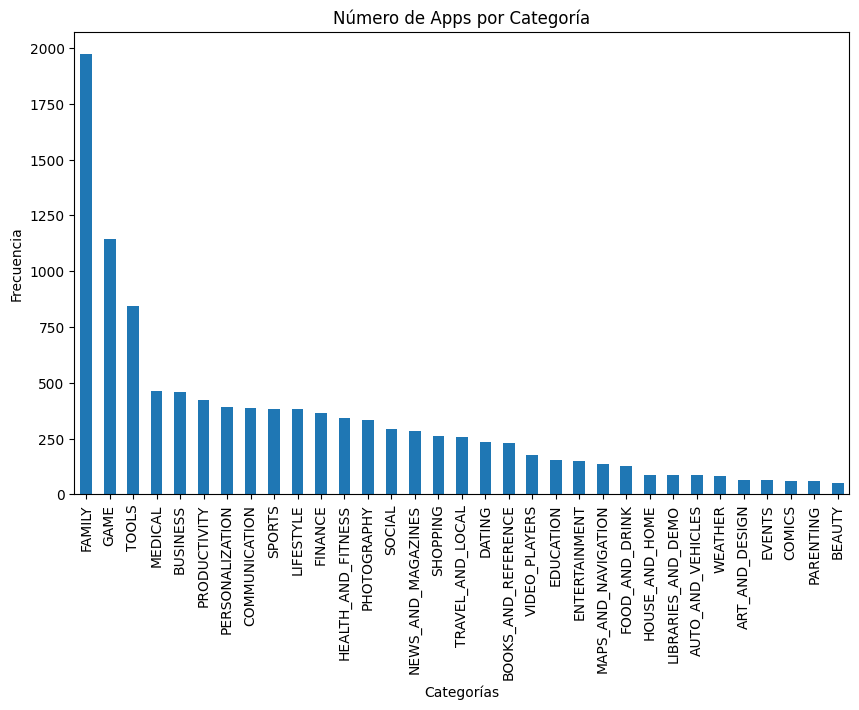

In [22]:
df_apps['Category'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Número de Apps por Categoría')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()


Observamos que claramente las apps más utilizadas son las destinadas a la familia, y tras éstas vienen las de juegos y las que se emplean como herramientas

c) Detección de valores atípicos (outliers):

Para variables numéricas, se pueden identificar con:

In [23]:
'''plt.boxplot(df_apps['Price'].dropna())
plt.title('Boxplot de Calificaciones')
plt.ylabel('Rating')
plt.show()'''


"plt.boxplot(df_apps['Price'].dropna())\nplt.title('Boxplot de Calificaciones')\nplt.ylabel('Rating')\nplt.show()"

In [24]:
'''df_apps['Price'].dropna().plot(kind='box', vert=False)
plt.title('Distribución de Precios')
plt.show()'''

"df_apps['Price'].dropna().plot(kind='box', vert=False)\nplt.title('Distribución de Precios')\nplt.show()"

El precio de las apps es muy diverso, pero la mayoría de aplicaciones tienen un precio gratuito.

**4 ANÁLISIS BIVARIANTE**


In [25]:
'''plt.figure(figsize=(8, 6))

sns.scatterplot(data=df_apps, x='Installs', y='Rating', alpha=0.5)
plt.xscale('log')  # Escala logarítmica para mejor visualización
plt.title('Relación entre Rating y Número de Descargas')
plt.xlabel('Número de Descargas (log)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()'''


"plt.figure(figsize=(8, 6))\n\nsns.scatterplot(data=df_apps, x='Installs', y='Rating', alpha=0.5)\nplt.xscale('log')  # Escala logarítmica para mejor visualización\nplt.title('Relación entre Rating y Número de Descargas')\nplt.xlabel('Número de Descargas (log)')\nplt.ylabel('Rating')\nplt.grid(True)\nplt.show()"

In [26]:
'''plt.figure(figsize=(8, 6))

sns.boxplot(data=df_apps, x='Type', y='Rating')
plt.title('Comparación de Ratings entre Apps Gratuitas y de Pago')
plt.xlabel('Tipo de App')
plt.ylabel('Rating')
plt.grid(True)
plt.show()'''


"plt.figure(figsize=(8, 6))\n\nsns.boxplot(data=df_apps, x='Type', y='Rating')\nplt.title('Comparación de Ratings entre Apps Gratuitas y de Pago')\nplt.xlabel('Tipo de App')\nplt.ylabel('Rating')\nplt.grid(True)\nplt.show()"

In [27]:
# Calcular correlación
'''correlation = df_apps[['Installs', 'Price']].corr()

# Mostrar gráfica
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_apps, x='Price', y='Installs', alpha=0.5)
plt.xscale('log')
plt.title(f'Relación entre Precio y Número de Descargas (Corr: {correlation.loc["Installs", "Price"]:.2f})')
plt.xlabel('Precio ($)')
plt.ylabel('Número de Descargas (log)')
plt.grid(True)
plt.show()'''


'correlation = df_apps[[\'Installs\', \'Price\']].corr()\n\n# Mostrar gráfica\nplt.figure(figsize=(8, 6))\nsns.scatterplot(data=df_apps, x=\'Price\', y=\'Installs\', alpha=0.5)\nplt.xscale(\'log\')\nplt.title(f\'Relación entre Precio y Número de Descargas (Corr: {correlation.loc["Installs", "Price"]:.2f})\')\nplt.xlabel(\'Precio ($)\')\nplt.ylabel(\'Número de Descargas (log)\')\nplt.grid(True)\nplt.show()'

In [28]:
'''from datetime import datetime

# Calcular la antigüedad de la app
df_apps['Last Updated'] = pd.to_datetime(df_apps['Last Updated'], errors='coerce')
df_apps['Age (Days)'] = (datetime.now() - df_apps['Last Updated']).dt.days

# Relación antigüedad vs rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_apps, x='Age (Days)', y='Rating', alpha=0.5)
plt.title('Relación entre Antigüedad de la App y Ratings')
plt.xlabel('Antigüedad (Días)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()'''


"from datetime import datetime\n\n# Calcular la antigüedad de la app\ndf_apps['Last Updated'] = pd.to_datetime(df_apps['Last Updated'], errors='coerce')\ndf_apps['Age (Days)'] = (datetime.now() - df_apps['Last Updated']).dt.days\n\n# Relación antigüedad vs rating\nplt.figure(figsize=(8, 6))\nsns.scatterplot(data=df_apps, x='Age (Days)', y='Rating', alpha=0.5)\nplt.title('Relación entre Antigüedad de la App y Ratings')\nplt.xlabel('Antigüedad (Días)')\nplt.ylabel('Rating')\nplt.grid(True)\nplt.show()"